In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib.rcsetup' has no attribute '_validators'

In [2]:
train = pd.read_csv('./used_car_train_20200313/used_car_train_20200313.csv', sep=' ')
test = pd.read_csv('./used_car_testB_20200421/used_car_testB_20200421.csv', sep=' ')
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [3]:
test.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [4]:
#train.info()
fills = ['model', 'bodyType', 'fuelType', 'gearbox']

In [5]:
# 有异常值'-'
train.select_dtypes('object').value_counts()

notRepairedDamage
0.0                  111361
-                     24324
1.0                   14315
dtype: int64

In [6]:
train.notRepairedDamage.replace('-', '0.0', inplace=True)

In [7]:
train.notRepairedDamage.value_counts()

0.0    135685
1.0     14315
Name: notRepairedDamage, dtype: int64

In [8]:
test.notRepairedDamage.replace('-', '0.0', inplace=True)

In [9]:
train.notRepairedDamage = train.notRepairedDamage.astype('float')
test.notRepairedDamage = test.notRepairedDamage.astype('float')

#### 怎么补充异常值？？

In [10]:
for i in fills:
    print(i,'缺失：',train[i].isna().sum())
    train[i] = train[i].fillna(train[i].mean())
    test[i] = test[i].fillna(test[i].mean())
    print(i,'补充后：',train[i].isna().sum())

model 缺失： 1
model 补充后： 0
bodyType 缺失： 4506
bodyType 补充后： 0
fuelType 缺失： 8680
fuelType 补充后： 0
gearbox 缺失： 5981
gearbox 补充后： 0


In [11]:
correlation = train.corr()

<AxesSubplot:>

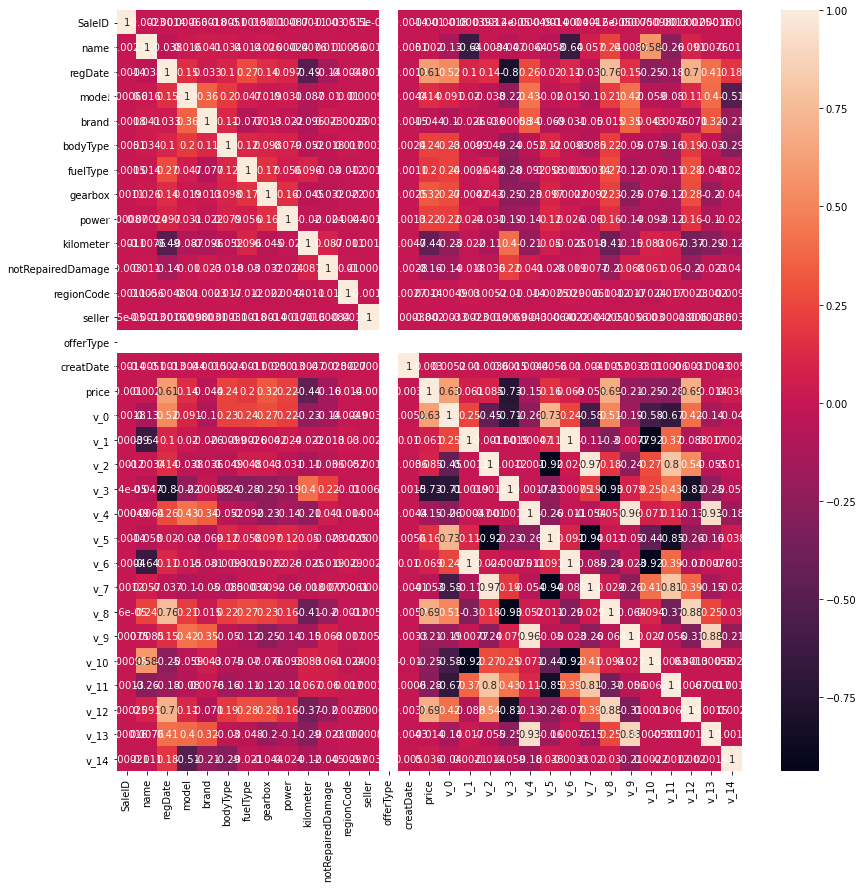

In [12]:
plt.figure(figsize=(14,14))
sns.heatmap(correlation, annot=True)

<AxesSubplot:>

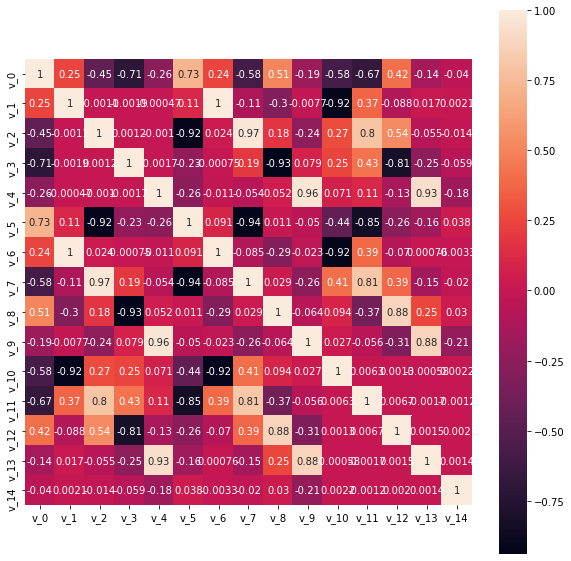

In [13]:
v_cor = train[['v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(v_cor,annot=True, square=True)

In [14]:
# 将相关性较强的drop
train.drop(columns=['v_6', 'v_7', 'v_9', 'v_13'],inplace=True)

In [15]:
test.drop(columns=['v_6', 'v_7', 'v_9', 'v_13'],inplace=True)

In [16]:
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_1,v_2,v_3,v_4,v_5,v_8,v_10,v_11,v_12,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,3.966344,0.050257,2.159744,1.143786,0.235676,0.022816,-2.881803,2.804097,-2.420821,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,5.236112,0.137925,1.380657,-1.422165,0.264777,0.026597,-4.900482,2.096338,-1.030483,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.062173,-4.846749,1.803559,1.565330,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.033395,-4.509599,1.285940,-0.501868,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,2.031433,0.572169,-1.571239,2.246088,0.228036,0.078819,-1.896240,0.910783,0.931110,1.923482


In [17]:
# 标签
label = train[['price']]

In [18]:
train.drop(columns=['SaleID','price'], inplace=True)
#test.drop(columns=['SaleID'], inplace=True)

### 时间：1.Diff=end-Start; 2.离散 年 月 日

In [19]:
def time_diff(data, start_time:str, end_time: str, format='%Y%m%d'):
    start = pd.to_datetime(data[start_time], format='%Y%m%d', errors='coerce')
    end = pd.to_datetime(data[end_time], format='%Y%m%d', errors='coerce')

    return (end-start).dt.days

In [20]:
train['usedDate'] = time_diff(train, 'regDate', 'creatDate')
test['usedDate'] = time_diff(test, 'regDate', 'creatDate')

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               150000 non-null  int64  
 1   regDate            150000 non-null  int64  
 2   model              150000 non-null  float64
 3   brand              150000 non-null  int64  
 4   bodyType           150000 non-null  float64
 5   fuelType           150000 non-null  float64
 6   gearbox            150000 non-null  float64
 7   power              150000 non-null  int64  
 8   kilometer          150000 non-null  float64
 9   notRepairedDamage  150000 non-null  float64
 10  regionCode         150000 non-null  int64  
 11  seller             150000 non-null  int64  
 12  offerType          150000 non-null  int64  
 13  creatDate          150000 non-null  int64  
 14  v_0                150000 non-null  float64
 15  v_1                150000 non-null  float64
 16  v_

In [22]:
train = train.fillna(-1)
test = test.fillna(-1)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               150000 non-null  int64  
 1   regDate            150000 non-null  int64  
 2   model              150000 non-null  float64
 3   brand              150000 non-null  int64  
 4   bodyType           150000 non-null  float64
 5   fuelType           150000 non-null  float64
 6   gearbox            150000 non-null  float64
 7   power              150000 non-null  int64  
 8   kilometer          150000 non-null  float64
 9   notRepairedDamage  150000 non-null  float64
 10  regionCode         150000 non-null  int64  
 11  seller             150000 non-null  int64  
 12  offerType          150000 non-null  int64  
 13  creatDate          150000 non-null  int64  
 14  v_0                150000 non-null  float64
 15  v_1                150000 non-null  float64
 16  v_

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb

In [25]:
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2)

In [26]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 103221 to 141111
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               120000 non-null  int64  
 1   regDate            120000 non-null  int64  
 2   model              120000 non-null  float64
 3   brand              120000 non-null  int64  
 4   bodyType           120000 non-null  float64
 5   fuelType           120000 non-null  float64
 6   gearbox            120000 non-null  float64
 7   power              120000 non-null  int64  
 8   kilometer          120000 non-null  float64
 9   notRepairedDamage  120000 non-null  float64
 10  regionCode         120000 non-null  int64  
 11  seller             120000 non-null  int64  
 12  offerType          120000 non-null  int64  
 13  creatDate          120000 non-null  int64  
 14  v_0                120000 non-null  float64
 15  v_1                120000 non-null  float64
 1

In [29]:
def XGB():
    model = xgb.XGBRegressor(n_estimators=1500, max_depth=7)
    
    param_grid = {'learning_rate':[0.01, 0.05, 0.1, 0.2]}
    model = GridSearchCV(model, param_grid)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    MAE = mean_absolute_error(y_test, y_pred)
    print('MAEL:', MAE)
    return model, y_pred, MAE


def LGB():
    model = lgb.LGBMRegressor(n_estimators=150, num_leaves=128)
    # 超参数寻优
    param_grid = {'learning_rate':[0.01, 0.05, 0.1, 0.2]}
    model = GridSearchCV(model, param_grid)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    MAE = mean_absolute_error(y_test, y_pred)
    print('MAE:', MAE)
    return model, y_pred, MAE

In [31]:
xgb_best, xgb_pred, xgb_mae = XGB()
lgb_best, lgb_pred, lgb_mae = LGB()

MAEL: 519.4013355068763
MAEL: 574.3996142292639


In [32]:
# 由于MAE是越小越好，因此在(xgb_mae + lgb_mae)中的占比越小越好，那权重就是1-比值
y_pred = (lgb_mae/(xgb_mae + lgb_mae)) * xgb_pred + (xgb_mae/(xgb_mae + lgb_mae)) * lgb_pred

In [33]:
MAE = mean_absolute_error(y_test, y_pred)
print('MAEL:', MAE)

MAEL: 528.9015248396942


In [34]:
def stats(data):
    print('min', data.min())
    print('max', data.max())
    print('mean', data.mean())
    print('std', data.std())

In [35]:
stats(label.values)

min 11
max 99999
mean 5923.327333333334
std 7501.973469876635


In [36]:
stats(y_pred)

min -1513.7808939330998
max 86620.79793785451
mean 5998.162555225499
std 7474.524455381058


### submission

In [ ]:
prediction = model.predict(test.drop(columns=['SaleID']))

In [38]:
x_p = xgb_best.predict(test.drop(columns=['SaleID']))
l_p = lgb_best.predict(test.drop(columns=['SaleID']))

In [40]:
# LGB XGB融合
y_pred = (lgb_mae/(xgb_mae + lgb_mae)) * x_p + (xgb_mae/(xgb_mae + lgb_mae)) * l_p

In [42]:
result = pd.DataFrame()
result['SaleID'] = test['SaleID']
result['price'] = y_pred
result.to_csv('submission.csv', index=False)

In [39]:
result = pd.DataFrame()
result['SaleID'] = test['SaleID']
result['price'] = x_p
result.to_csv('submission_x_p.csv', index=False)

result = pd.DataFrame()
result['SaleID'] = test['SaleID']
result['price'] = l_p
result.to_csv('submission_l_p.csv', index=False)